In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 

In [2]:
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS
from textblob import TextBlob
import re
from collections import Counter
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md

import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install millify
from millify     import millify

In [4]:
#Data Importation
df= pd.read_csv(r'C:\Users\JENNIFER AMIOSINOR\OneDrive\Desktop\covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [5]:
df.shape

(102601, 13)

In [7]:
print('There are {} rows and {} columns in the dataset'.format(df.shape[0], df.shape[1]))

There are 102601 rows and 13 columns in the dataset


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102601 entries, 0 to 102600
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         102601 non-null  object
 1   user_location     81775 non-null   object
 2   user_description  96813 non-null   object
 3   user_created      102601 non-null  object
 4   user_followers    102601 non-null  int64 
 5   user_friends      102601 non-null  int64 
 6   user_favourites   102601 non-null  int64 
 7   user_verified     102601 non-null  bool  
 8   date              102601 non-null  object
 9   text              102601 non-null  object
 10  hashtags          73065 non-null   object
 11  source            102574 non-null  object
 12  is_retweet        102601 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 8.8+ MB


In [10]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.026010e+05,102601.000000,1.026010e+05
mean,1.018105e+05,2173.201908,1.504107e+04
std,8.027212e+05,9607.486075,4.586419e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.710000e+02,156.000000,2.260000e+02
50%,9.840000e+02,555.000000,1.905000e+03
75%,5.229000e+03,1764.000000,9.897000e+03
max,1.389284e+07,497363.000000,2.047197e+06


In [11]:
df.isna().sum()

user_name               0
user_location       20826
user_description     5788
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            29536
source                 27
is_retweet              0
dtype: int64

Data Visualization

In [13]:
#Showing Missing Value
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

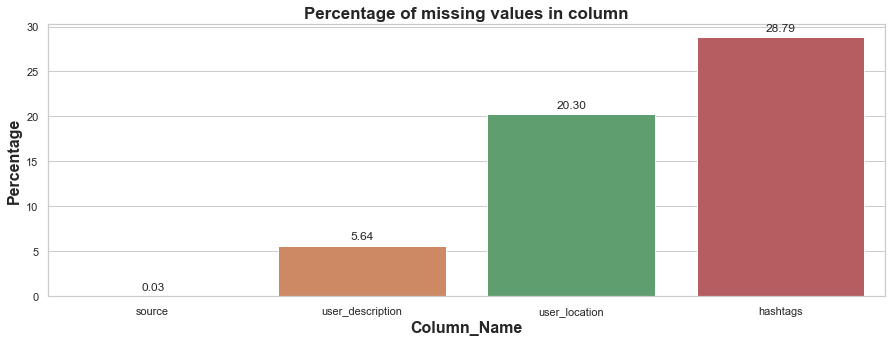

In [14]:
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=16, weight="bold")
plt.ylabel("Percentage", size=16, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()

<AxesSubplot:xlabel='user_verified', ylabel='count'>

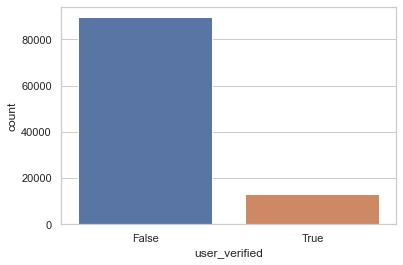

In [15]:
#Showing Verified User
sns.countplot(x="user_verified", data=df)

<AxesSubplot:xlabel='is_retweet', ylabel='count'>

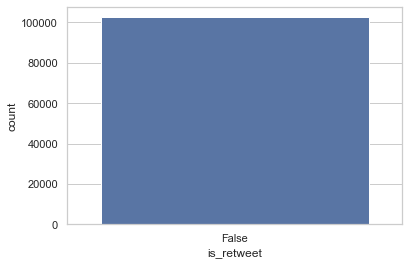

In [16]:
sns.countplot(x="is_retweet", data=df)

<AxesSubplot:>

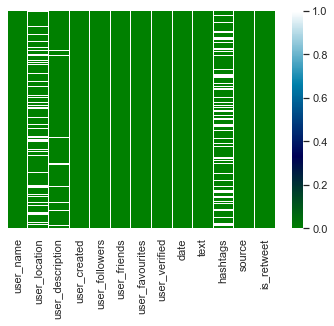

In [17]:
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='ocean')

Plot Unique Values

In [18]:
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [21]:
unique = return_unique_values(df)
print(unique)

            Features  Uniques
0          user_name    59510
1      user_location    18570
2   user_description    56929
3       user_created    60432
4     user_followers    19523
5       user_friends     8806
6    user_favourites    25760
7      user_verified        2
8               date    76322
9               text   102408
10          hashtags    31436
11            source      514
12        is_retweet        1


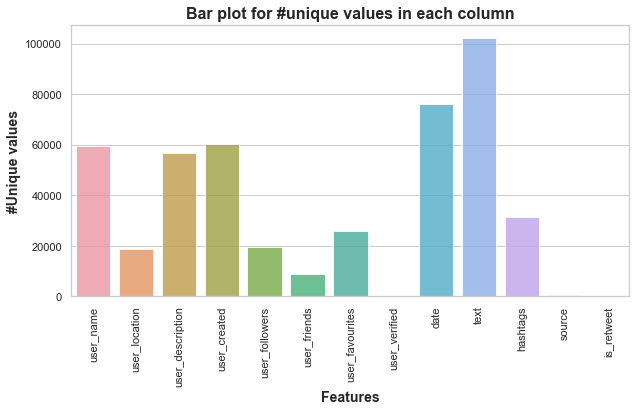

In [22]:
f, ax = plt.subplots(1,1, figsize=(10,5))#plt.figure(figsize=(10, 5))

sns.barplot(x=unique['Features'], y=unique['Uniques'], alpha=0.8)
plt.title('Bar plot for #unique values in each column',fontsize=16, weight= "bold")
plt.ylabel('#Unique values', fontsize=14, weight= "bold")
plt.xlabel('Features', fontsize=14, weight= "bold")
plt.xticks(rotation=90)
plt.show()

Frequency of users tweeting about Corona

In [23]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature), weight='bold', size=15)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

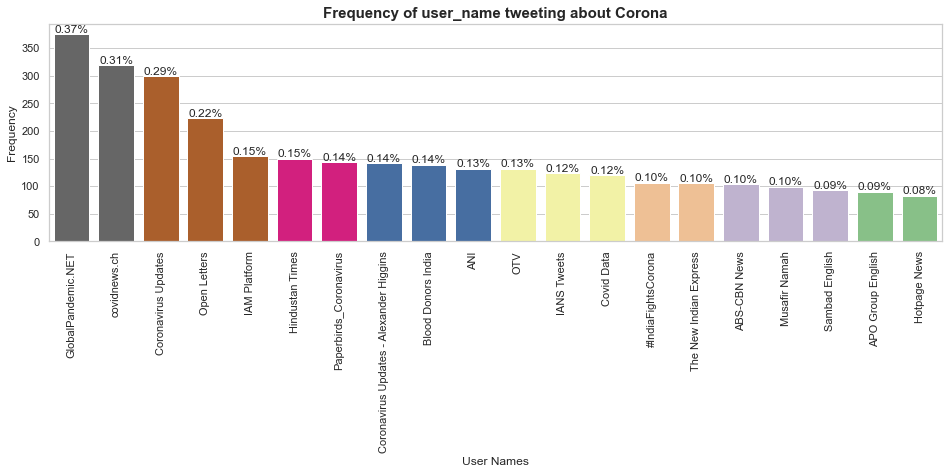

In [57]:
plot_frequency_charts(df, 'user_name', 'User Names', 'Accent_r')

locations tweeting about Corona

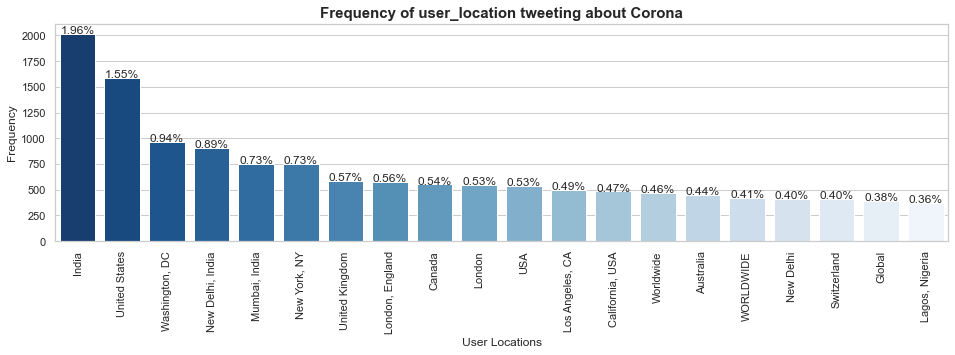

In [58]:
plot_frequency_charts(df, 'user_location', 'User Locations', 'Blues_r')

Frequency of sources tweeting about Corona

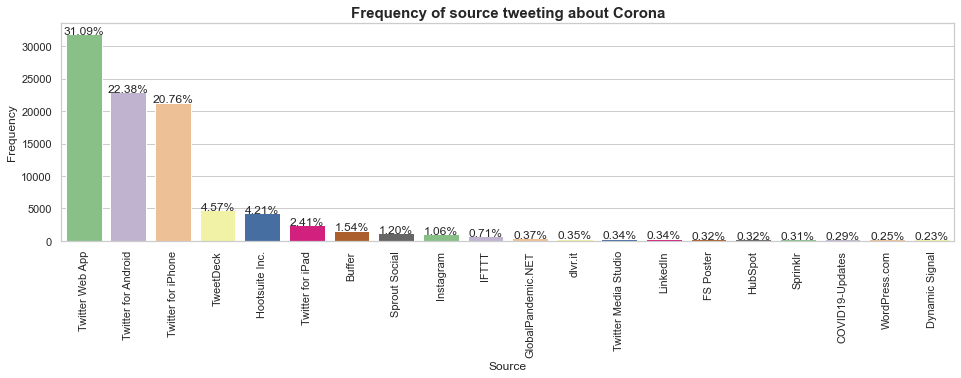

In [59]:
plot_frequency_charts(df, 'source','Source', 'Accent')

In [61]:
df = df.fillna('None')

def wordcloud(string,title,color):
    wc = WordCloud(background_color=color, width=1200,height=600,mask=None,random_state=1,
                   max_font_size=200,stopwords=stop_words,collocations=False).generate(string)
    fig=plt.figure(figsize=(20,8))
    plt.axis('off')
    plt.title('--- WordCloud for {} --- '.format(title),weight='bold', size=30)
    plt.imshow(wc)

In [62]:
stop_words=set(STOPWORDS)
source_string = " ".join(df['source'].astype('str'))
hastage_string = " ".join(df['hashtags'].astype('str'))
location_string = " ".join(df['user_location'].astype('str'))

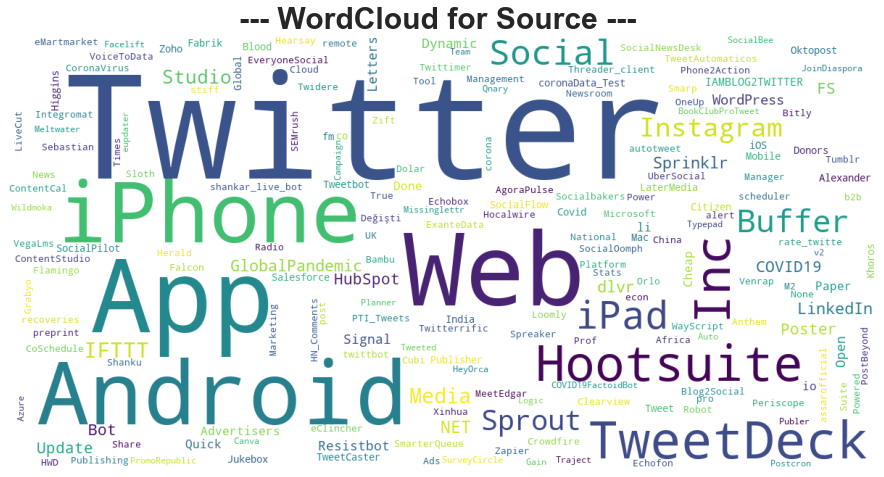

In [63]:
wordcloud(source_string,'Source','white')

Covid 19 Tweet Sentiment Analysis

Process Datasets

In [64]:
# Drop Columns
drop_columns = [
    'user_name',
    'user_description',
    'user_created',
    'user_followers',
    'user_friends',
    'user_favourites',
    'user_verified',
    'hashtags',
    'source',
    'is_retweet'
]

df.drop(columns=drop_columns, inplace=True)
df.head()

,user_location,date,text
0,astroworld,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,"New York, NY",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,"Pewee Valley, KY",2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,Stuck in the Middle,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,Jammu and Kashmir,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


Basic Tweet Processing


In [68]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

from textblob import TextBlob
from textblob import Word


stop_words = set(stopwords.words('english'))

def tweet_scrubber(tweet):
   
    # Make tweets all lower case
    tweet = tweet.lower()
#     # Remove Mentions
    tweet = re.sub(r'@[A-Za-z0-9_]+','',tweet)
#     # Remove URLs
#     tweet = re.sub(r"http\S+", "", tweet)
#     # Remove Numbers
#     tweet = re.sub(r"[0-9]*", "", tweet)
#     # Remove Special Characters, and Punctuations
#     tweet = re.sub(r"(”|“|-|\+|`|#|,|;|\|)*", "", tweet)
#     tweet = re.sub(r"&amp", "", tweet)
    
    to_remove = r'\d+|http?\S+|[^A-Za-z0-9]+'
    tweet = re.sub(to_remove, " ", tweet)
    return tweet
        

def tokenization_and_stem(tweet, stem=False, lemmatize=False):
        
    filtered_tweet = []
    words = word_tokenize(tweet) 

    # Remove stopwords and stem
    for word in words:
        if not word in stop_words:
            if lemmatize:
                filtered_tweet.append(Word(word).lemmatize())
            else:
                filtered_tweet.append(word)
            
    return filtered_tweet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pajos_TM\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [72]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
df.text = df.text.apply(lambda x: tokenization_and_stem(tweet_scrubber(x), lemmatize=True))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pajos_TM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pajos_TM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Pajos_TM\AppData\Roaming\nltk_data...


In [73]:
df.text.head()

0    [smelled, scent, hand, sanitizers, today, some...
1             [hey, made, sense, player, pay, respect]
2    [trump, never, claimed, covid, hoax, claim, ef...
3    [one, gift, covid, give, appreciation, simple,...
4    [july, medium, bulletin, novel, coronavirusupd...
Name: text, dtype: object

Sentiment Analysis

In [74]:
def sentiment_analysis(df):
    
    # Determine polarity and subjectivity
    df['Polarity'] = df['text'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
    df['Subjectivity'] = df['text'].apply(lambda x: TextBlob(' '.join(x)).sentiment.subjectivity)
    
    # Classify overall sentiment
    df.loc[df.Polarity > 0,'Sentiment'] = 'positive'
    df.loc[df.Polarity == 0,'Sentiment'] = 'neutral'
    df.loc[df.Polarity < 0,'Sentiment'] = 'negative'
    
    return df[['text','Polarity','Subjectivity','Sentiment']].head()

In [75]:
sentiment_analysis(df)

,text,Polarity,Subjectivity,Sentiment
0,"[smelled, scent, hand, sanitizers, today, some...",-0.25,0.250000,negative
1,"[hey, made, sense, player, pay, respect]",0.00,0.000000,neutral
2,"[trump, never, claimed, covid, hoax, claim, ef...",0.00,0.000000,neutral
3,"[one, gift, covid, give, appreciation, simple,...",0.00,0.357143,neutral
4,"[july, medium, bulletin, novel, coronavirusupd...",0.00,0.000000,neutral
